In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.stats

In [2]:
dfLoad =pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/ClassificationSample2.txt", sep="\s+")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jeong\AppData\Local\Temp\ipykernel_5000\1902993597.py:1: SyntaxWarning: invalid escape sequence '\s'
  dfLoad =pd.read_csv("https://raw.githubusercontent.com/hanwoolJeong/lectureUniv/main/ClassificationSample2.txt", sep="\s+")


In [3]:
samples = np.array(dfLoad)
x = samples[:, 0]
y = samples[:, 1]

In [4]:
numK = 2
N = len(x)
# Initialize the 가중치
pi = np.ones(numK)*(1/numK)

[mx, sx] = [np.mean(x), np.std(x)]
[my, sy] = [np.mean(y), np.std(y)]

u0 = np.array([my-sx, my+sy])
u1 = np.array([my+sx, my-sy])
Sigma0 = np.array([[sx*sx/4, 0], [0, sy*sy/4]])
Sigma1 = np.array([[sx*sx/4, 0], [0, sy*sy/4]])
R = np.ones([N, numK])*(1/numK)

In [6]:
while(True):
    N0 = sp.stats.multivariate_normal.pdf(samples, u0, Sigma0)
    N1 = sp.stats.multivariate_normal.pdf(samples, u1, Sigma1)
    # E-step
    Rold = np.copy(R)
    R = np.array([pi[0]*N0/(pi[0]*N0+pi[1]*N1), pi[1]*N1/(pi[0]*N0+pi[1]*N1)]).T

    if (np.linalg.norm(R-Rold)<N*numK*0.0001):
        break
    # M-step
    pi = np.ones(N).reshape(1,N).dot(R)/N 
    pi = pi.reshape(2,)
    weightedSum = samples.T.dot(R)

    u0 = weightedSum[:,0]/sum(R[:,0])
    u1 = weightedSum[:,1]/sum(R[:,1])
    Sigma0 = samples.T.dot(np.multiply(R[:,0].reshape(N,1), samples))/sum(R[:,0]) - u0.reshape(2,1)*u0.reshape(2,1).T
    Sigma1 = samples.T.dot(np.multiply(R[:,1].reshape(N,1), samples))/sum(R[:,1]) - u1.reshape(2,1)*u1.reshape(2,1).T

In [7]:
k = np.round(R[:,1])
dfCluster = pd.DataFrame(np.c_[x, y, k])
dfCluster.columns = ['x', 'y', 'k']
dfGroup = dfCluster.groupby('k')

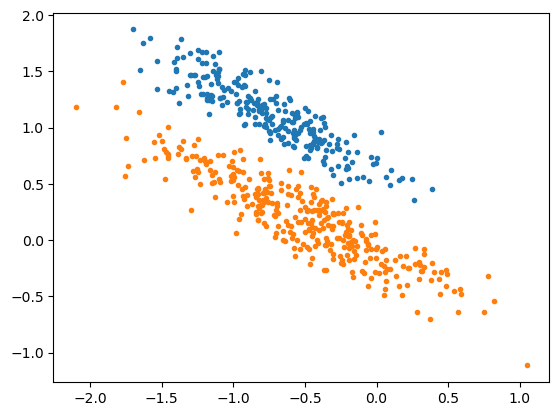

In [9]:
f2 = plt.figure(2)
ax2 = f2.add_subplot(111)
for cluster, dataGroup in dfGroup:
    ax2.plot(dataGroup['x'], dataGroup['y'], marker='.', linestyle='', label=cluster)